              Method Training MSE Training R2  Test MSE   Test R2
0  Linear regression     1.013989    0.769513  0.999084  0.770565
          Method Training MSE Training R2  Test MSE   Test R2
0  Random forest     1.050251     0.76127  1.046995  0.759562


Text(0.5, 0, 'Experimental LogS')

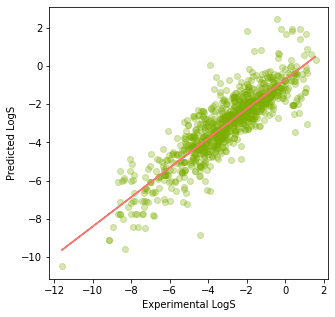

In [3]:
# import pandas library as pd for ease of typing
import pandas as pd
# data read in as a dataframe in the df variable
df = pd.read_csv('data.csv')

# assign the first 4 columns to the X variable by dropping the 'logS' column
X = df.drop(['logS'], axis=1)

# assign the 'logS' column to the y variable
y = df.logS

# for data splitting 
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

# import for traditional linear regression as lr for ease of typing
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train, y_train)
y_lr_train_pred = lr.predict(X_train)
y_lr_test_pred = lr.predict(X_test)

#calculate performance metrics for linear regression model
from sklearn.metrics import mean_squared_error, r2_score

lr_train_mse = mean_squared_error(y_train, y_lr_train_pred)
lr_train_r2 = r2_score(y_train, y_lr_train_pred)

lr_test_mse = mean_squared_error(y_test, y_lr_test_pred)
lr_test_r2 = r2_score(y_test, y_lr_test_pred)

#consolidate performance metrics for linear regression model
lr_results = pd.DataFrame(['Linear regression',lr_train_mse, lr_train_r2, lr_test_mse, lr_test_r2]).transpose()
lr_results.columns = ['Method','Training MSE','Training R2','Test MSE','Test R2']
print(lr_results)

#random forest model
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(max_depth=2, random_state=42)
rf.fit(X_train, y_train)

#make predictions on the training set
y_rf_train_pred = rf.predict(X_train)
y_rf_test_pred = rf.predict(X_test)

#calculate the performance metrics for the constructed random forest model
from sklearn.metrics import mean_squared_error, r2_score
rf_train_mse = mean_squared_error(y_train, y_rf_train_pred)
rf_train_r2 = r2_score(y_train, y_rf_train_pred)

rf_test_mse = mean_squared_error(y_test, y_rf_test_pred)
rf_test_r2 = r2_score(y_test, y_rf_test_pred)

rf_results = pd.DataFrame(['Random forest',rf_train_mse, rf_train_r2, rf_test_mse, rf_test_r2]).transpose()
rf_results.columns = ['Method','Training MSE','Training R2','Test MSE','Test R2']
print(rf_results)

#extra tree regressor model
from sklearn.tree import ExtraTreeRegressor
et = ExtraTreeRegressor(random_state=42)
et.fit(X_train, y_train)

#concatenate linear regression and random forest results
pd.concat([lr_results, rf_results])

#visualize linear regression data: actual Y values with their predicted Y values
import matplotlib.pyplot as plt
import numpy as np
plt.figure(figsize=(5,5))
plt.scatter(x=y_train, y=y_lr_train_pred, c="#7CAE00", alpha=0.3)
z = np.polyfit(y_train, y_lr_train_pred, 1)
p = np.poly1d(z)
plt.plot(y_train,p(y_train),"#F8766D")
plt.ylabel('Predicted LogS')
plt.xlabel('Experimental LogS')